#  مراحل پیش پردازش

In [ ]:
import numpy as np
import pandas as pd

In [1]:
data = pd.read_csv('../online_retail.csv')
data.head()

NameError: name 'pd' is not defined

# پاکسازی داده ها


In [ ]:
data = data.dropna(subset=['CustomerID'])
data = data[data['Quantity'] > 0]
data['TotalSpent'] = data['Quantity'] * data['UnitPrice']
customer_data = data.groupby('CustomerID').agg({
'TotalSpent': 'sum',
'InvoiceNo': 'nunique'
}).reset_index()


# نرمال سازی داده ها

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_data_scaler = scaler.fit_transform(customer_data[['TotalSpent','InvoiceNo']])

# ترسیم دندروگرام


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

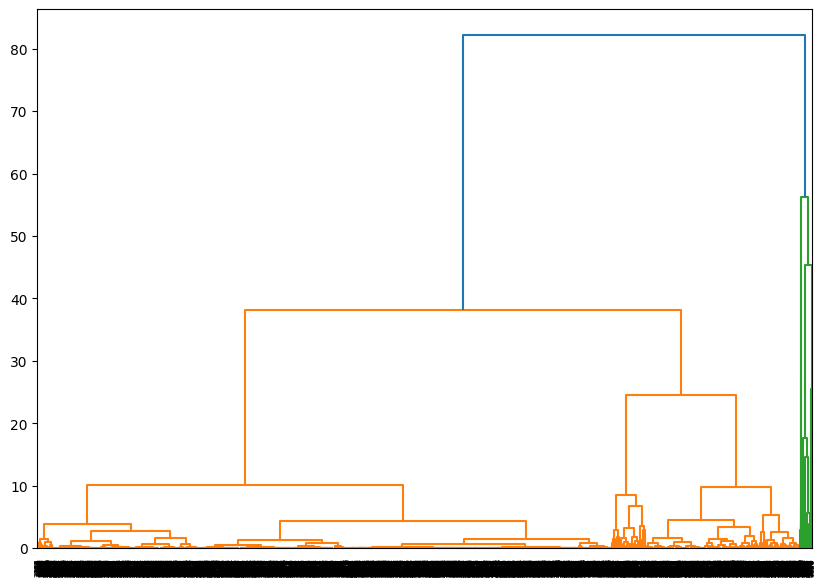

In [ ]:
z = linkage(customer_data_scaler, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(z)
plt.show()

# اجرای  خوشه بندی سلسله مراتبی

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=4)
customer_data['HierarchicalClustering'] = hierarchical.fit_predict(customer_data_scaler)

# ارزیابی


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(customer_data_scaler,customer_data['HierarchicalClustering'])
print(f'silhouette score for Hierarchical Clustering {score * 100}')

Hierarchical Clustering score for kmeans 88.1038055075185
